In [1]:
!ls

adrec.py       dreamrec.py	 metrics.py	       svae.py
baseline.bash  eulerformer.py	 model.py	       toy0.pt
baselines      fearec.py	 pcgrad.py	       toy1.pt
bert4rec.py    grad.ipynb	 plot_beta.ipynb       toy2.pt
beta.bash      gru4rec.py	 plot_contourf.ipynb   toy.py
beta.png       __init__.py	 plot_dif_steps.ipynb  trainer.py
cfg.bash       lightsans.py	 plot_lam.ipynb        trimlp.py
common.py      linearprob.ipynb  process_log.ipynb     t-SNE.ipynb
config.yaml    logger.py	 __pycache__	       tune.ipynb
core.py        log_loss.ipynb	 sasrec.py	       utils.py
diffrec.py     logs		 saved
diffurec.py    loss.bash	 step_sample.py
diffusion.py   main.py		 stosa.py


In [2]:
import re
import pandas as pd

# 给定多个日志文件的具体路径列表
log_files = [
    'logs/adrec/yelp/2025-01-24_18-06-06_dif_step.log',  # 替换为实际日志文件路径
    'logs/diffurec/yelp/2025-01-25_16-13-57_diffurec.log', 
    'logs/dreamrec/yelp/2025-01-18_14-08-00_.log',# 替换为实际日志文件路径
    'logs/adrec/yelp/2025-01-18_19-39-50_pre_pc_warmup_5_lambda.log',
    # 可以继续添加更多日志文件路径
]

# 初始化一个空的 DataFrame 用来存储所有模型的数据
all_losses = pd.DataFrame(columns=['model_name', 'epoch', 'ce_loss', 'dif_loss'])
model_names=['ADRec','DiffuRec','DreamRec','w. PCGrad']
# 遍历每个日志文件路径
for i,log_file_path in enumerate(log_files):
    # 提取模型名作为数据中的一部分（可以从文件名中获取）
    model_name = model_names[i]  # 通过文件名提取模型名

    # 初始化epoch计数器
    epoch = 0
    
    # 存储当前日志文件的数据
    temp_losses = []

    # 打开当前日志文件并逐行读取
    with open(log_file_path, 'r') as file:
        for line in file:
            # 使用正则表达式提取ce_loss和dif_loss
            match = re.search(r'ce_loss (\d+\.\d+), dif_loss (\d+\.\d+)', line)
            if match:
                # 提取的值
                ce_loss = float(match.group(1))
                dif_loss = float(match.group(2))
                
                # 将数据添加到临时列表
                temp_losses.append({
                    'model_name': model_name,
                    'epoch': epoch,
                    'ce_loss': ce_loss,
                    'dif_loss': dif_loss
                })
                
                # 增加epoch
                epoch += 1

    # 将当前模型的损失数据添加到all_losses DataFrame
    if temp_losses:
        all_losses = pd.concat([all_losses, pd.DataFrame(temp_losses)], ignore_index=True)

# 打印整合后的DataFrame
all_losses


# 保存DataFrame为CSV文件，方便后续处理
# all_losses.to_csv('model_losses.csv', index=False)


/tmp/ipykernel_3375185/939464954.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_losses = pd.concat([all_losses, pd.DataFrame(temp_losses)], ignore_index=True)


,model_name,epoch,ce_loss,dif_loss
0,ADRec,0,11.069,0.725
1,ADRec,1,11.066,0.093
2,ADRec,2,11.077,0.006
3,ADRec,3,11.077,0.001
4,ADRec,4,11.077,0.001
...,...,...,...,...
224,w. PCGrad,71,7.789,0.052
225,w. PCGrad,72,7.782,0.052
226,w. PCGrad,73,7.775,0.052
227,w. PCGrad,74,7.770,0.052


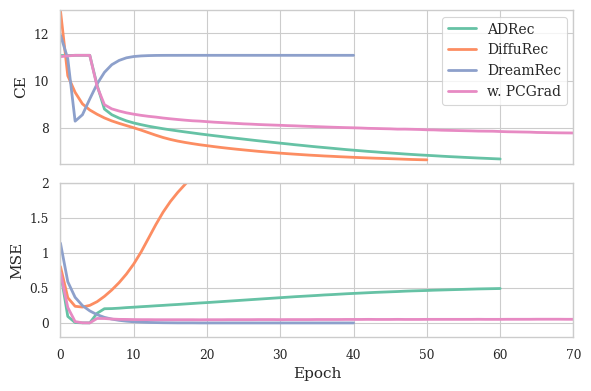

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style='whitegrid')
sns.set_context("paper")
plt.rcParams.update({
    "font.family": "serif",
})

# 创建一个包含 2 行 1 列的子图
fig, axes = plt.subplots(2, 1, figsize=(6, 4))  # 两行一列的布局

# 定义颜色调色板
# colors = sns.cubehelix_palette(n_colors=5)[::-1]
colors = sns.color_palette("Set2", 4)
# 绘制 ce_loss 子图
sns.lineplot(x='epoch', y='ce_loss', hue='model_name', data=all_losses, ax=axes[0],linewidth = 2,palette=colors)
# axes[0].set_title('CE Loss Curves for Different Models', fontsize=12)
axes[0].set_xlabel('', fontsize=11)
axes[0].set_ylabel('CE', fontsize=11)
axes[0].legend(title='', fontsize=10)
# axes[0].legend([], [], frameon=False)
axes[0].set_ylim(6.5, 13)
axes[0].set_xlim(0, 70)
axes[0].set_xticklabels([] )  # 设置显示的刻度标签
# 绘制 dif_loss 子图
sns.lineplot(x='epoch', y='dif_loss', hue='model_name', data=all_losses,linewidth = 2 , ax=axes[1],palette=colors)
# axes[1].set_title('MSE Loss Curves for Different Models', fontsize=10)
axes[1].set_xlabel('Epoch', fontsize=11)
axes[1].set_ylabel('MSE', fontsize=11)
axes[1].legend([], [], frameon=False)
# axes[1].legend(title='', fontsize=10)
axes[1].set_ylim(-0.2, 2)
axes[1].set_yticks([0, 0.5, 1, 1.5, 2, ])  # 设置特定的x轴刻度
axes[1].set_yticklabels([0, 0.5, 1, 1.5, 2,] )  # 设置显示的刻度标签
axes[1].set_xlim(0, 70)
# 自动调整子图的布局
plt.tight_layout()

# 保存并显示图表
plt.savefig('../imgs/loss_subplots.svg', bbox_inches='tight',dpi=300)
plt.show()
plt.close()


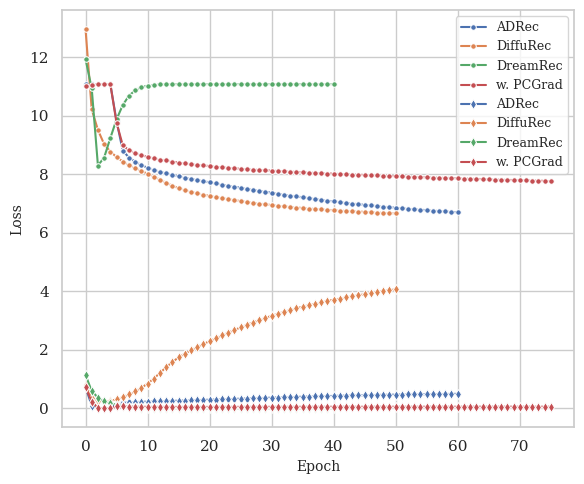

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
# 设置绘图风格
sns.set(style='whitegrid')
plt.rcParams.update({
    "font.family": "serif",
})
# 创建一个绘图对象
plt.figure(figsize=(6, 5))
colors = sns.cubehelix_palette(n_colors=5)
# 绘制 ce_loss 和 dif_loss 随 epoch 变化的曲线
sns.lineplot(x='epoch', y='ce_loss', hue='model_name', data=all_losses, marker='o',markersize=4)
sns.lineplot(x='epoch', y='dif_loss', hue='model_name', data=all_losses, marker='d',markersize=5)

# 设置标题和标签
# plt.title('Loss Curves for Different Models', fontsize=12)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.legend(title='', fontsize=9)

# 显示图表
plt.tight_layout()
# plt.savefig('../imgs/loss.pdf',bbox_inches='tight')
plt.show()
plt.close()